In [91]:
# install xbg module
pip install xgboost

Note: you may need to restart the kernel to use updated packages.Collecting xgboost
                                              0.0/70.9 MB ? eta -:--:--
                                             0.0/70.9 MB 660.6 kB/s eta 0:01:48
                                             0.0/70.9 MB 660.6 kB/s eta 0:01:48
                                             0.0/70.9 MB 326.8 kB/s eta 0:03:37
                                             0.1/70.9 MB 328.2 kB/s eta 0:03:36
                                             0.1/70.9 MB 353.1 kB/s eta 0:03:21
                                             0.1/70.9 MB 327.7 kB/s eta 0:03:37
                                             0.1/70.9 MB 327.2 kB/s eta 0:03:37
                                             0.1/70.9 MB 327.4 kB/s eta 0:03:37
                                             0.1/70.9 MB 340.5 kB/s eta 0:03:28
                                             0.2/70.9 MB 374.1 kB/s eta 0:03:10
                                            

In [1]:
#Importing the necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import regex as re
import math
from tqdm import tqdm
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import PredictionErrorDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
import warnings
warnings.simplefilter(action = 'ignore', category= FutureWarning)
warnings.filterwarnings('ignore')

In [46]:
#read the train csv dataset
train_data = pd.read_csv("train.csv")
train_data.info()
train_data.columns
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [47]:
#read the test csv dataset
test_data = pd.read_csv("test.csv")
test_data.info()
test_data.columns
test_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [48]:
# checking the dimension of the data set
train_data.shape,test_data.shape

((8523, 12), (5681, 11))

In [49]:
#checking duplicate values if present in the data
duplicate_rowstr = train_data[train_data.duplicated()]
print("Number of duplicate rows :: ", duplicate_rowstr.shape)
duplicate_rowste = test_data[test_data.duplicated()]
print("Number of duplicate rows :: ", duplicate_rowste.shape)

Number of duplicate rows ::  (0, 12)
Number of duplicate rows ::  (0, 11)


In [50]:
# remove unimportant features from the data
train_data.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
train_data.info()
test_data.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                6113 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dty

In [51]:
train_data.isna().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [52]:
test_data.isna().sum()

Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [53]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<Axes: xlabel='Item_Weight', ylabel='Count'>

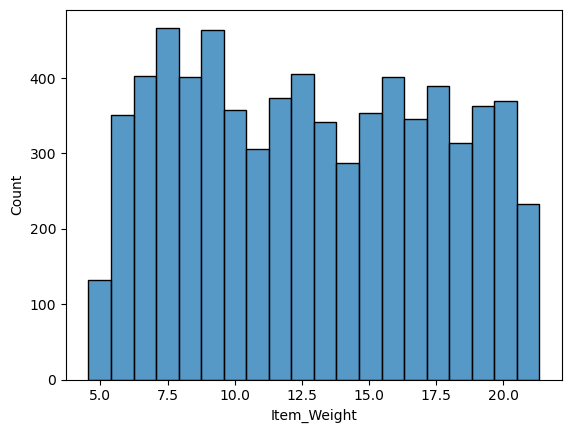

In [54]:
sns.histplot(data=train_data,x='Item_Weight')

In [55]:
#replacing null values with mean values
train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(),inplace=True) 
#replacing null values of test dataset with corresponding mean values of train dataset
test_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(),inplace=True) 

In [56]:
train_data.isna().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [57]:
test_data.isna().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [58]:
train_data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

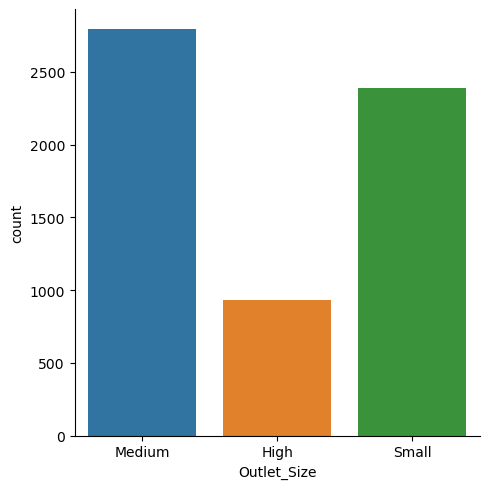

In [59]:
sns.catplot(data=train_data, x="Outlet_Size", kind="count")

<Axes: xlabel='Item_Outlet_Sales', ylabel='Outlet_Size'>

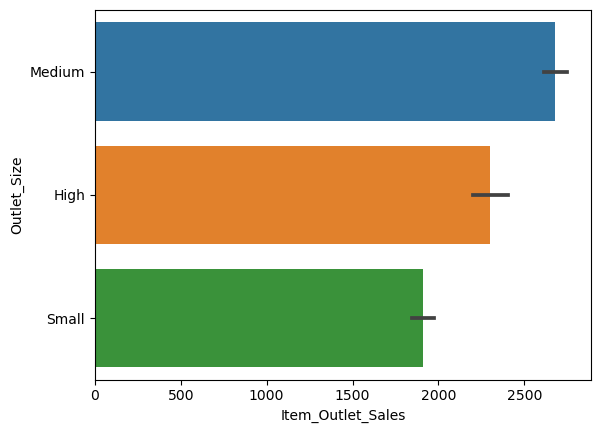

In [60]:
sns.barplot(train_data, x='Item_Outlet_Sales', y='Outlet_Size')

In [61]:
# replacing null values with mode values as Outlet_Size is catagorical 
train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0],inplace=True)

test_data['Outlet_Size'].fillna(test_data['Outlet_Size'].mode()[0],inplace=True)

In [62]:
train_data.isna().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [63]:
test_data.isna().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

                           Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.012049  0.024756   
Item_Visibility              -0.012049         1.000000 -0.001315   
Item_MRP                      0.024756        -0.001315  1.000000   
Outlet_Establishment_Year    -0.008301        -0.074834  0.005020   
Item_Outlet_Sales             0.011550        -0.128625  0.567574   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                -0.008301           0.011550  
Item_Visibility                            -0.074834          -0.128625  
Item_MRP                                    0.005020           0.567574  
Outlet_Establishment_Year                   1.000000          -0.049135  
Item_Outlet_Sales                          -0.049135           1.000000  
Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')


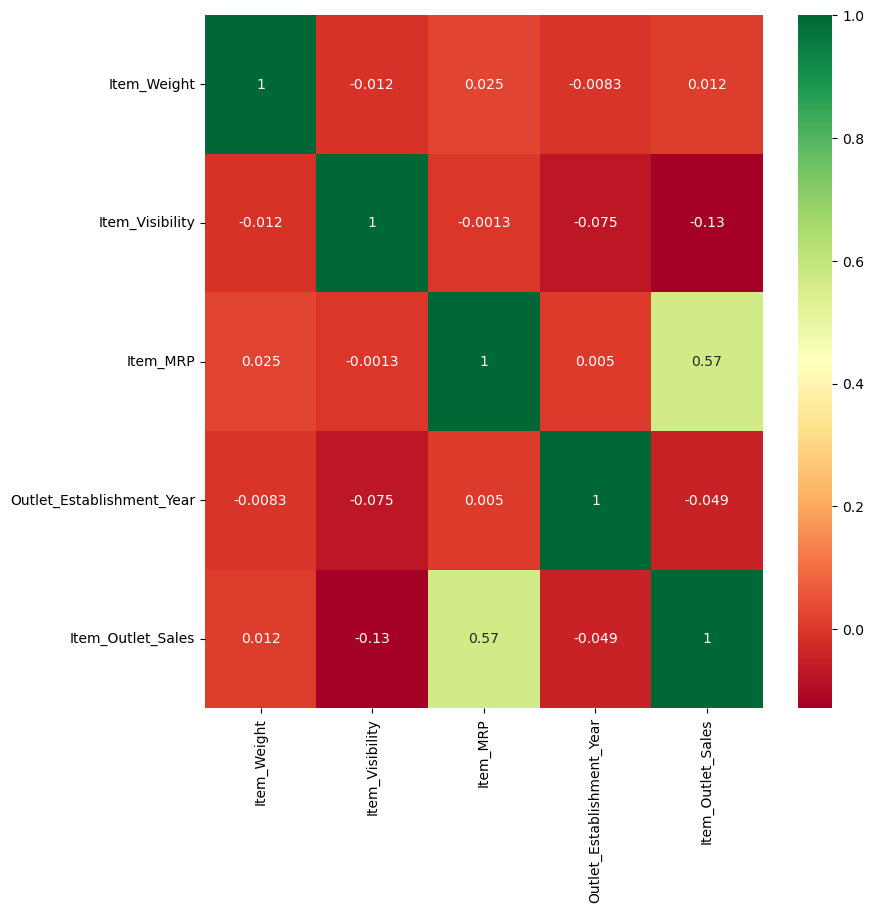

In [64]:
# correlation of each feature in dataset
# plot heat map
corrmat = train_data.corr()
print(corrmat)
top_corr_features = corrmat.index
print(top_corr_features)
plt.figure(figsize=(9,9))
g=sns.heatmap(train_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [65]:
cat_columns=[x for x in train_data.dtypes.index if train_data.dtypes[x]=='object']
cat_columns

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [66]:
# frequencies of the categories
for col in cat_columns:
    print('frequency of categories for variable')
    print(train_data[col].value_counts())

frequency of categories for variable
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
frequency of categories for variable
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
frequency of categories for variable
Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64
frequency of categories for variable
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64
frequency of categories for variable
Supermarket Type1    5577

In [67]:
for col in cat_columns:
    print('frequency of categories for variable')
    print(test_data[col].value_counts())

frequency of categories for variable
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64
frequency of categories for variable
Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64
frequency of categories for variable
Medium    3468
Small     1592
High       621
Name: Outlet_Size, dtype: int64
frequency of categories for variable
Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64
frequency of categories for variable
Supermarket Type1    3717
Grocery Store  

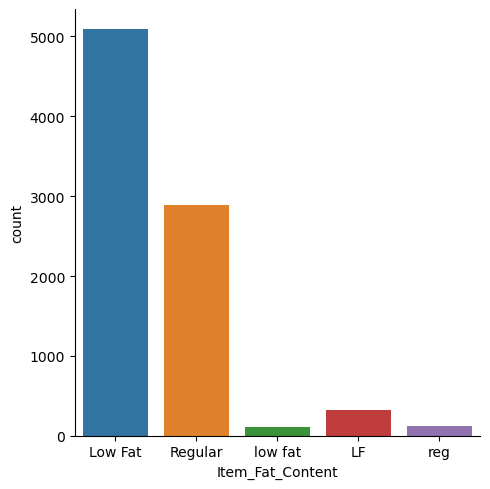

In [68]:
sns.catplot(data=train_data, x="Item_Fat_Content", kind="count")

In [69]:
train_data.Item_Fat_Content=train_data.Item_Fat_Content.replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
train_data.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [70]:
test_data.Item_Fat_Content=test_data.Item_Fat_Content.replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
test_data.Item_Fat_Content.value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

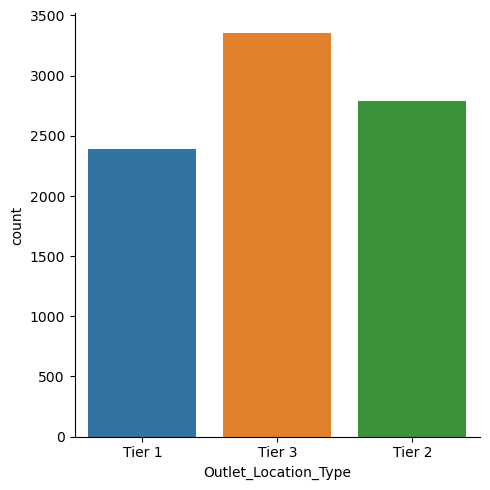

In [71]:
sns.catplot(data=train_data, x="Outlet_Location_Type", kind="count")

<Axes: xlabel='Item_Outlet_Sales', ylabel='Outlet_Location_Type'>

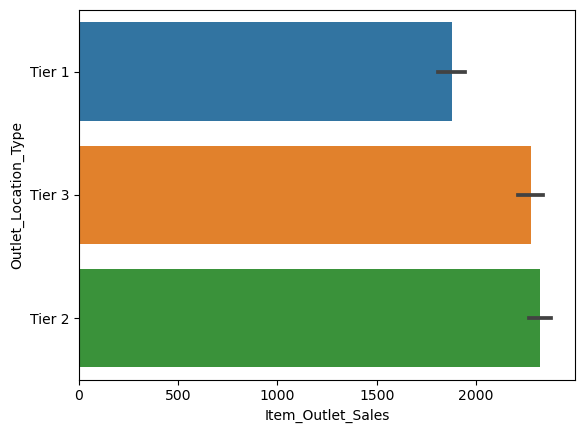

In [72]:
sns.barplot(train_data, x='Item_Outlet_Sales', y='Outlet_Location_Type')

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

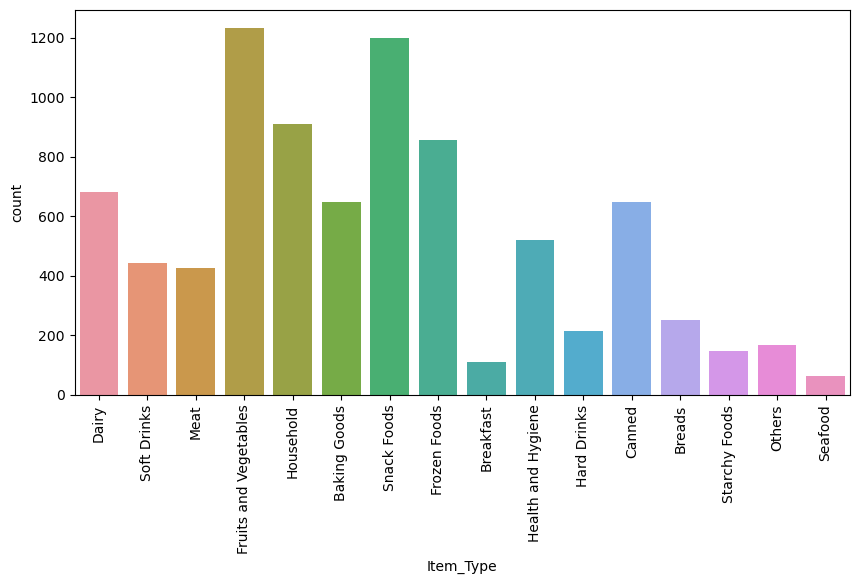

In [73]:
plt.figure(figsize=(10,5))
IT=sns.countplot(data=train_data, x="Item_Type")
IT.set_xticklabels(IT.get_xticklabels(), rotation=90)

<Axes: xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

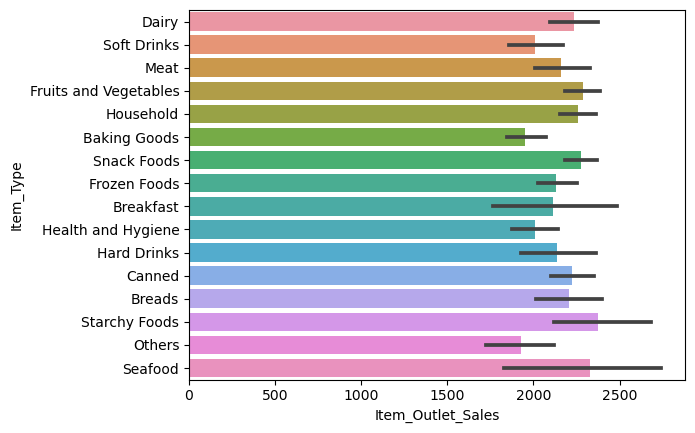

In [74]:
sns.barplot(train_data, y='Item_Type', x='Item_Outlet_Sales')

<Axes: xlabel='Outlet_Type', ylabel='count'>

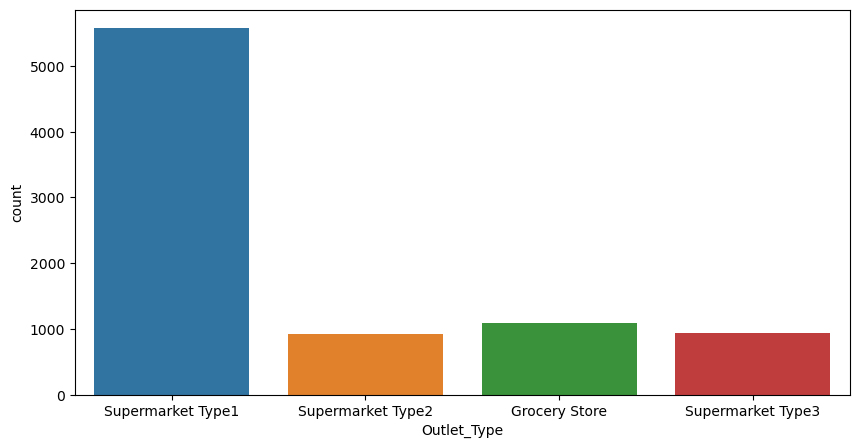

In [75]:
plt.figure(figsize=(10,5))
sns.countplot(data=train_data, x="Outlet_Type")

<Axes: xlabel='Item_Outlet_Sales', ylabel='Outlet_Type'>

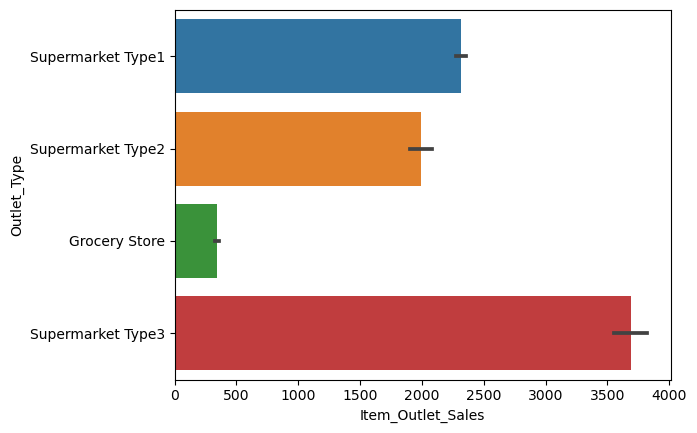

In [76]:
sns.barplot(train_data, y='Outlet_Type', x='Item_Outlet_Sales')

In [77]:
# changing the categorical variable 
le = LabelEncoder()
data_cat =train_data[['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type']].apply(le.fit_transform)
data_numeric=train_data.drop(columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type'])
train_data = pd.concat([data_cat,data_numeric],axis=1,ignore_index=False)
train_data.head()

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,0,4,1,0,1,9.30,0.016047,249.8092,1999,3735.1380
1,1,14,1,2,2,5.92,0.019278,48.2692,2009,443.4228
2,0,10,1,0,1,17.50,0.016760,141.6180,1999,2097.2700
3,1,6,1,2,0,19.20,0.000000,182.0950,1998,732.3800
4,0,9,0,2,1,8.93,0.000000,53.8614,1987,994.7052


In [78]:
# spliting the predictor variable and the explanatory variables from train datasset 
X = train_data.drop(columns='Item_Outlet_Sales')
y = train_data['Item_Outlet_Sales']
X.shape, y.shape

((8523, 9), (8523,))

In [79]:
# We split the data into training and validation(testing) set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6818, 9), (6818,), (1705, 9), (1705,))

In [80]:
# converting the categorical variables into array of the numerical data
from sklearn.preprocessing import OneHotEncoder

cat_cols =['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type']
ohc = OneHotEncoder(handle_unknown='ignore')
ohc.fit(np.array(X_train[cat_cols]))
X_train_ohc = ohc.transform(np.array(X_train[cat_cols])).toarray()
X_test_ohc = ohc.transform(np.array(X_test[cat_cols])).toarray()
X_train_ohc.shape, X_test_ohc.shape

((6818, 28), (1705, 28))

In [81]:
X_train.drop(columns=cat_cols,inplace=True)
X_test.drop(columns=cat_cols,inplace=True)
X_train[['Low Fat','Regular','Baking Goods','Breads','Breakfast','Canned','Dairy','Frozen Foods','Fruits and Vegetables',
         'Hard Drinks','Health and Hygiene','Household','Meat','Others','Seafood','Snack Foods','Soft Drinks','Starchy Foods',
         'High','Medium','Small','Tier 1','Tier 2','Tier 3','Grocery Store','Supermarket Type1','Supermarket Type2',
         'Supermarket Type3']] = X_train_ohc
X_test[['Low Fat','Regular','Baking Goods','Breads','Breakfast','Canned','Dairy','Frozen Foods','Fruits and Vegetables',
         'Hard Drinks','Health and Hygiene','Household','Meat','Others','Seafood','Snack Foods','Soft Drinks','Starchy Foods',
         'High','Medium','Small','Tier 1','Tier 2','Tier 3','Grocery Store','Supermarket Type1','Supermarket Type2',
         'Supermarket Type3']] = X_test_ohc

In [82]:
# standardizing the numerical data features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']])
X_train_std = scaler.transform(X_train[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']])
X_test_std = scaler.transform(X_test[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']])
X_train_std.shape, X_test_std.shape

((6818, 4), (1705, 4))

In [83]:
X_train.drop(columns=['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year'],inplace=True)
X_test.drop(columns=['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year'],inplace=True)
X_train[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']] = X_train_std
X_test[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']] = X_test_std
X_train

,Low Fat,Regular,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,...,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
549,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.800211,-0.600703,0.470709,0.136169
7757,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.211317,-0.362159,0.457877,0.493521
764,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.116657,0.194933,-0.482625,-0.102066
6867,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,-1.078275,-0.704944,-1.603553,0.493521
2716,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.007432,1.383177,0.218375,-0.102066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,-0.825059,4.282848,-0.043511,0.017052
5191,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.643357,1.001006,-1.059078,1.089109
5390,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.116657,-0.916931,1.526207,0.493521
860,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.767446,-0.228187,-0.383072,1.089109


In [84]:
# converting test dataset 
ohc.fit(np.array(test_data[cat_cols]))
test_data_ohc = ohc.transform(np.array(test_data[cat_cols])).toarray()

test_data.drop(columns=cat_cols,inplace=True)
test_data[['Low Fat','Regular','Baking Goods','Breads','Breakfast','Canned','Dairy','Frozen Foods','Fruits and Vegetables',
         'Hard Drinks','Health and Hygiene','Household','Meat','Others','Seafood','Snack Foods','Soft Drinks','Starchy Foods',
         'High','Medium','Small','Tier 1','Tier 2','Tier 3','Grocery Store','Supermarket Type1','Supermarket Type2',
         'Supermarket Type3']] = test_data_ohc

scaler.fit(test_data[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']])
test_data_std = scaler.transform(test_data[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']])

test_data.drop(columns=['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year'],inplace=True)
test_data[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']] = test_data_std
test_data

,Low Fat,Regular,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,...,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.890707,-1.134077,-0.536555,0.139891
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,-1.041979,-0.531850,-0.868937,1.095512
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.442031,0.661316,1.629848,0.020438
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,-1.274003,-0.981416,0.226697,1.095512
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.031607,1.032540,1.508110,-1.532446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.523753,-1.018333,0.004727,-0.099015
5677,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,-1.206869,1.508493,0.455014,1.334417
5678,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,-0.641532,0.153074,-0.360485,0.498248
5679,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.606921,-1.281690,1.190844,1.095512


In [85]:
# Linear Regression
lr = LinearRegression()
reg = lr.fit(X_train,y_train)
predictions = reg.predict(X_test)
print(predictions)

[1372.  776.  764. ...  810.  554. 1710.]


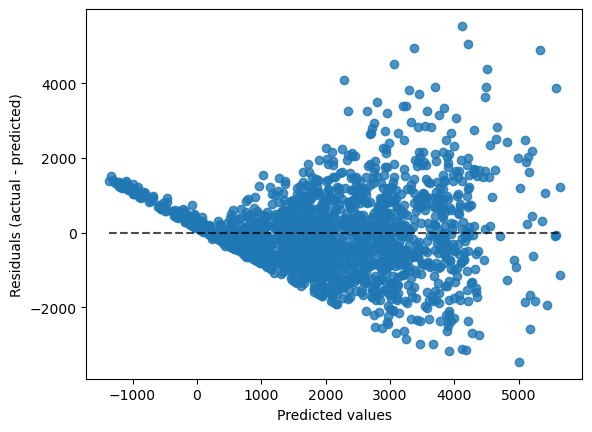

In [86]:
from sklearn.metrics import PredictionErrorDisplay

display = PredictionErrorDisplay(y_true=y_test,y_pred=predictions)
display.plot()
plt.show()

In [87]:
df_to_understand = pd.concat([X_test,y_test],axis=1,ignore_index=False)
df_to_understand.rename(columns={'Item_Outlet_Sales':'Actual_Item_Outlet_Sales'},inplace=True)
df_to_understand

,Low Fat,Regular,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,...,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Actual_Item_Outlet_Sales
7503,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.335711,-0.773887,-0.998908,-1.293240,1743.0644
2957,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,-1.171752,0.097978,-1.586048,-0.102066,356.8688
7031,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.383041,-0.481942,-1.596652,0.136169,377.5086
1084,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,-0.005623,-0.414780,0.508453,-1.531475,5778.4782
856,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,-0.635739,-1.043092,0.889079,0.731756,2356.9320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7205,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,-0.255915,0.535890,-0.235593,-0.102066,3004.0896
3257,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,-1.387104,-1.285303,0.100223,1.327344,890.8404
6346,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.383041,-0.483857,-1.596652,-1.293240,629.1810
6318,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,-0.729216,1.460103,-1.461459,1.327344,253.0040


In [88]:
df_to_understand['Predicted_Item_Outlet_Sales'] = predictions
df_to_understand

,Low Fat,Regular,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,...,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Actual_Item_Outlet_Sales,Predicted_Item_Outlet_Sales
7503,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.335711,-0.773887,-0.998908,-1.293240,1743.0644,1372.0
2957,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-1.171752,0.097978,-1.586048,-0.102066,356.8688,776.0
7031,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.383041,-0.481942,-1.596652,0.136169,377.5086,764.0
1084,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-0.005623,-0.414780,0.508453,-1.531475,5778.4782,4226.0
856,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-0.635739,-1.043092,0.889079,0.731756,2356.9320,3288.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7205,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-0.255915,0.535890,-0.235593,-0.102066,3004.0896,2092.0
3257,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,-1.387104,-1.285303,0.100223,1.327344,890.8404,2172.0
6346,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.383041,-0.483857,-1.596652,-1.293240,629.1810,810.0
6318,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,-0.729216,1.460103,-1.461459,1.327344,253.0040,554.0


In [89]:
df_to_understand['error'] = df_to_understand['Actual_Item_Outlet_Sales']-df_to_understand['Predicted_Item_Outlet_Sales']
df_to_understand

,Low Fat,Regular,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,...,Supermarket Type1,Supermarket Type2,Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Actual_Item_Outlet_Sales,Predicted_Item_Outlet_Sales,error
7503,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.335711,-0.773887,-0.998908,-1.293240,1743.0644,1372.0,371.0644
2957,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,-1.171752,0.097978,-1.586048,-0.102066,356.8688,776.0,-419.1312
7031,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.383041,-0.481942,-1.596652,0.136169,377.5086,764.0,-386.4914
1084,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.005623,-0.414780,0.508453,-1.531475,5778.4782,4226.0,1552.4782
856,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,-0.635739,-1.043092,0.889079,0.731756,2356.9320,3288.0,-931.0680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7205,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,-0.255915,0.535890,-0.235593,-0.102066,3004.0896,2092.0,912.0896
3257,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,-1.387104,-1.285303,0.100223,1.327344,890.8404,2172.0,-1281.1596
6346,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.383041,-0.483857,-1.596652,-1.293240,629.1810,810.0,-180.8190
6318,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.729216,1.460103,-1.461459,1.327344,253.0040,554.0,-300.9960


In [90]:
r2_val=round(r2_score(y_test,predictions),2)
rmse_val = round(mean_squared_error(y_test,predictions,squared=False),2)
mae_val = round(mean_absolute_error(y_test,predictions),2)
mape_val = round(mean_absolute_percentage_error(y_test,predictions),2)

print(tabulate([['Linear_Regression',r2_val,rmse_val,mae_val,mape_val]],headers=['ML_Algorithm','R^2','RMSE','MAE','MAPE'],tablefmt='grid'))

+-------------------+-------+---------+-------+--------+
| ML_Algorithm      |   R^2 |    RMSE |   MAE |   MAPE |
+===================+=======+=========+=======+========+
| Linear_Regression |  0.58 | 1068.54 | 791.3 |   1.05 |
+-------------------+-------+---------+-------+--------+


In [91]:
feature_df = pd.DataFrame()
feature_df['features'] = X_train.columns
feature_df['weights'] = reg.coef_
feature_df

,features,weights
0,Low Fat,-2.232884e+01
1,Regular,1.251111e+01
2,Baking Goods,-1.088441e+16
3,Breads,-1.088441e+16
4,Breakfast,-1.088441e+16
5,Canned,-1.088441e+16
6,Dairy,-1.088441e+16
7,Frozen Foods,-1.088441e+16
8,Fruits and Vegetables,-1.088441e+16
9,Hard Drinks,-1.088441e+16


In [92]:
#Ridge Regression
from sklearn.linear_model import Ridge

ridge_reg = Ridge()
ridge_reg.fit(X_train,y_train)

ridge_predictions = ridge_reg.predict(X_test)
print(ridge_predictions)

[1358.99077632  764.90212445  818.43093585 ...  849.28068764  565.67172846
 1725.93745279]


In [93]:
r2_val1=round(r2_score(y_test,ridge_predictions),2)
rmse_val1 = round(mean_squared_error(y_test,ridge_predictions,squared=False),2)
mae_val1= round(mean_absolute_error(y_test,ridge_predictions),2)
mape_val1= round(mean_absolute_percentage_error(y_test,ridge_predictions),2)

print(tabulate([['Ridge_Regression',r2_val1,rmse_val1,mae_val1,mape_val1]],headers=['ML_Algorithm','R^2','RMSE','MAE','MAPE'],tablefmt='grid'))

+------------------+-------+---------+--------+--------+
| ML_Algorithm     |   R^2 |    RMSE |    MAE |   MAPE |
+==================+=======+=========+========+========+
| Ridge_Regression |  0.58 | 1069.14 | 791.67 |   1.06 |
+------------------+-------+---------+--------+--------+


In [94]:
#Lasso Regression
from sklearn.linear_model import Lasso

lasso_reg = Lasso()
lasso_reg.fit(X_train,y_train)

lasso_predictions = lasso_reg.predict(X_test)
print(lasso_predictions)

[1360.85589657  765.58357266  799.02773401 ...  828.96431964  575.79818468
 1803.92558716]


In [95]:
r2_val2=round(r2_score(y_test,lasso_predictions),2)
rmse_val2 = round(mean_squared_error(y_test,lasso_predictions,squared=False),2)
mae_val2= round(mean_absolute_error(y_test,lasso_predictions),2)
mape_val2= round(mean_absolute_percentage_error(y_test,lasso_predictions),2)

print(tabulate([['Lasso_Regression',r2_val2,rmse_val2,mae_val2,mape_val2]],headers=['ML_Algorithm','R^2','RMSE','MAE','MAPE'],tablefmt='grid'))

+------------------+-------+---------+--------+--------+
| ML_Algorithm     |   R^2 |    RMSE |    MAE |   MAPE |
+==================+=======+=========+========+========+
| Lasso_Regression |  0.58 | 1069.98 | 792.07 |   1.06 |
+------------------+-------+---------+--------+--------+


In [96]:
comparison_df = pd.DataFrame()
comparison_df['Actual_y'] = y_test
comparison_df['Linear_Reg_predictions'] = predictions
comparison_df['Lasso_Reg_predictions'] = lasso_predictions         #Uses L1 regularization
comparison_df['Ridge_Reg_predictions'] = ridge_predictions         #Uses L2 regularization
comparison_df

,Actual_y,Linear_Reg_predictions,Lasso_Reg_predictions,Ridge_Reg_predictions
7503,1743.0644,1372.0,1360.855897,1358.990776
2957,356.8688,776.0,765.583573,764.902124
7031,377.5086,764.0,799.027734,818.430936
1084,5778.4782,4226.0,4238.598238,4226.207328
856,2356.9320,3288.0,3272.964150,3291.486264
...,...,...,...,...
7205,3004.0896,2092.0,2116.061867,2093.270944
3257,890.8404,2172.0,2165.653422,2168.076608
6346,629.1810,810.0,828.964320,849.280688
6318,253.0040,554.0,575.798185,565.671728


RMSE value is: 1579.009


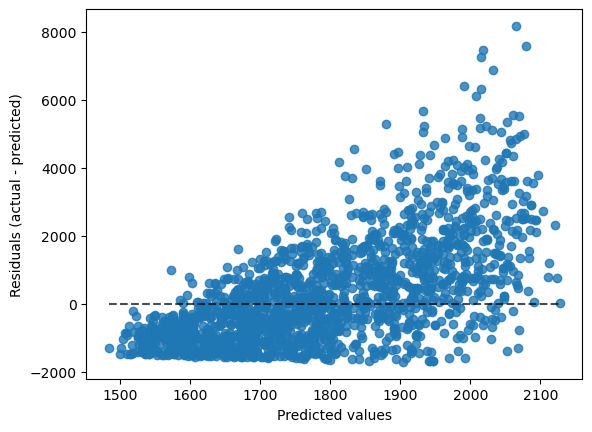

In [97]:
# Support Vector Regression
svr = SVR()
svr_reg = svr.fit(X_train,y_train)

svr_predictions = svr_reg.predict(X_test)
print("RMSE value is: {}".format(round(mean_squared_error(y_test,svr_predictions,squared=False),3)))
display = PredictionErrorDisplay(y_true=y_test,y_pred=svr_predictions)
display.plot()
plt.show()

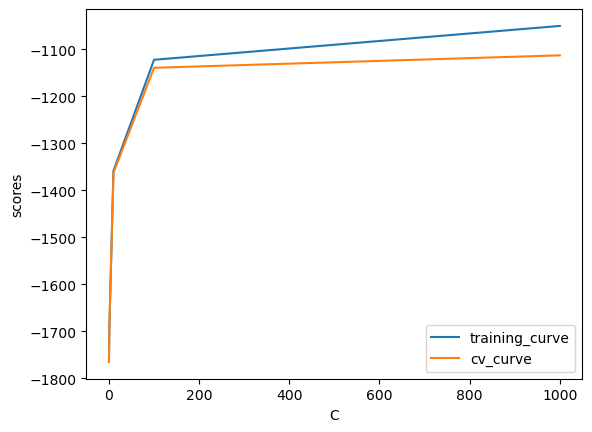

Best hyper parameters: {'C': 1000}
Best score: -1113.1704926281197


In [98]:
# Cross validation
clf = SVR()
params = {
    'C' : [0.0001,0.001,0.01,0.1,1,10,100,1000],
}
clf_cv = RandomizedSearchCV(clf,params,scoring='neg_root_mean_squared_error',cv=5,return_train_score=True)
clf_cv.fit(X_train,y_train)

train_score = clf_cv.cv_results_['mean_train_score']
test_score = clf_cv.cv_results_['mean_test_score']
n_neigh = clf_cv.cv_results_['param_C']

plt.plot(n_neigh,train_score,label='training_curve')
plt.plot(n_neigh,test_score,label='cv_curve')
plt.xlabel('C')
plt.ylabel('scores')
plt.legend()
plt.show()

print("Best hyper parameters: {}".format(clf_cv.best_params_))
print("Best score: {}".format(clf_cv.best_score_))

RMSE value is: 1033.076


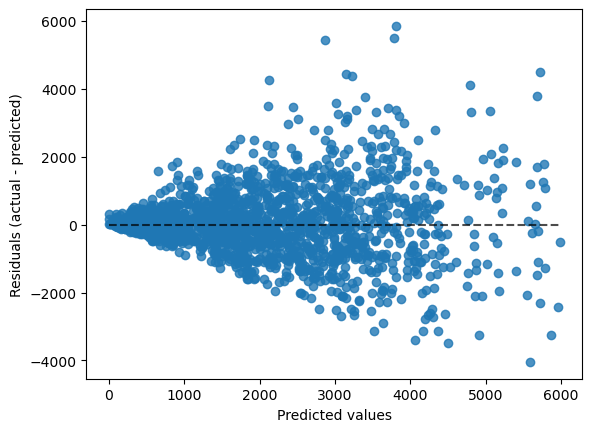

In [99]:
#Training the model with best hyper parameters
sv_reg = SVR(C=1000)
sv_reg.fit(X_train,y_train)

predictions_CV = sv_reg.predict(X_test)
print("RMSE value is: {}".format(round(mean_squared_error(y_test,predictions_CV,squared=False),3)))
display = PredictionErrorDisplay(y_true=y_test,y_pred=predictions_CV)
display.plot()
plt.show()

In [100]:
r2_val3=round(r2_score(y_test,predictions_CV),2)
rmse_val3 = round(mean_squared_error(y_test,predictions_CV,squared=False),2)
mae_val3= round(mean_absolute_error(y_test,predictions_CV),2)
mape_val3= round(mean_absolute_percentage_error(y_test,predictions_CV),2)

print(tabulate([['Support_Vector_Regression',r2_val3,rmse_val3,mae_val3,mape_val3]],
               headers=['ML_Algorithm','R^2','RMSE','MAE','MAPE'],tablefmt='grid'))

+---------------------------+-------+---------+-------+--------+
| ML_Algorithm              |   R^2 |    RMSE |   MAE |   MAPE |
+===========================+=======+=========+=======+========+
| Support_Vector_Regression |  0.61 | 1033.08 |   720 |   0.54 |
+---------------------------+-------+---------+-------+--------+


In [101]:
# Random Forest Regressor
rf= RandomForestRegressor()
rf.fit(X_train,y_train)
predictions_rf= rf.predict(X_test)
print(predictions_rf)

[ 828.315122  899.502458  817.56911  ...  856.638254  569.085892
 1440.484932]


In [102]:
r2_val4=round(r2_score(y_test,predictions_rf),2)
rmse_val4 = round(mean_squared_error(y_test,predictions_rf,squared=False),2)
mae_val4= round(mean_absolute_error(y_test,predictions_rf),2)
mape_val4= round(mean_absolute_percentage_error(y_test,predictions_rf),2)

print(tabulate([['Random_Forest_Regressor',r2_val4,rmse_val4,mae_val4,mape_val4]],
               headers=['ML_Algorithm','R^2','RMSE','MAE','MAPE'],tablefmt='grid'))

+-------------------------+-------+---------+-------+--------+
| ML_Algorithm            |   R^2 |    RMSE |   MAE |   MAPE |
+=========================+=======+=========+=======+========+
| Random_Forest_Regressor |  0.56 | 1096.53 | 765.3 |   0.58 |
+-------------------------+-------+---------+-------+--------+


In [103]:
# XG Boost Regressor
xg= XGBRegressor()
xg.fit(X_train, y_train)
predictions_xg= xg.predict(X_test)
print(predictions_xg)

[1053.576    679.98346  814.1956  ...  729.0659   933.85297 1431.6089 ]


In [104]:
r2_val5=round(r2_score(y_test,predictions_xg),2)
rmse_val5 = round(mean_squared_error(y_test,predictions_xg,squared=False),2)
mae_val5= round(mean_absolute_error(y_test,predictions_xg),2)
mape_val5= round(mean_absolute_percentage_error(y_test,predictions_xg),2)

print(tabulate([['XG_Boost_Regressor',r2_val5,rmse_val5,mae_val5,mape_val5]],headers=['ML_Algorithm','R^2','RMSE','MAE','MAPE'],tablefmt='grid'))

+--------------------+-------+---------+--------+--------+
| ML_Algorithm       |   R^2 |    RMSE |    MAE |   MAPE |
+====================+=======+=========+========+========+
| XG_Boost_Regressor |  0.53 | 1125.02 | 785.37 |   0.63 |
+--------------------+-------+---------+--------+--------+


In [105]:
# Decision Tree Regressor
DT = DecisionTreeRegressor(random_state=0)
DT.fit(X_train,y_train)
DT_prediction = DT.predict(X_test)
print(DT_prediction)

[ 402.809   703.0848  690.4346 ... 1006.6896  614.5334 3185.853 ]


In [106]:
r2_val6=round(r2_score(y_test,DT_prediction),2)
rmse_val6 = round(mean_squared_error(y_test,DT_prediction,squared=False),2)
mae_val6= round(mean_absolute_error(y_test,DT_prediction),2)
mape_val6= round(mean_absolute_percentage_error(y_test,DT_prediction),2)

print(tabulate([['Decision_Tree_Regressor',r2_val6,rmse_val6,mae_val6,mape_val6]],
               headers=['ML_Algorithm','R^2','RMSE','MAE','MAPE'],tablefmt='grid'))

+-------------------------+-------+--------+---------+--------+
| ML_Algorithm            |   R^2 |   RMSE |     MAE |   MAPE |
+=========================+=======+========+=========+========+
| Decision_Tree_Regressor |  0.17 | 1501.5 | 1031.43 |   0.71 |
+-------------------------+-------+--------+---------+--------+


In [108]:
print(tabulate([['Decision_Tree_Regressor',r2_val6,rmse_val6,mae_val6,mape_val6],
                ['XG_Boost_Regressor',r2_val5,rmse_val5,mae_val5,mape_val5],
                ['Random_Forest_Regressor',r2_val4,rmse_val4,mae_val4,mape_val4],
                ['Lasso_Regression',r2_val2,rmse_val2,mae_val2,mape_val2],
                ['Ridge_Regression',r2_val1,rmse_val1,mae_val1,mape_val1],
                ['Linear_Regression',r2_val,rmse_val,mae_val,mape_val],
                ['Support_Vector_Regression',r2_val3,rmse_val3,mae_val3,mape_val3]],
               headers=['ML_Algorithm','R^2','RMSE','MAE','MAPE'],tablefmt='grid'))

+---------------------------+-------+---------+---------+--------+
| ML_Algorithm              |   R^2 |    RMSE |     MAE |   MAPE |
+===========================+=======+=========+=========+========+
| Decision_Tree_Regressor   |  0.17 | 1501.5  | 1031.43 |   0.71 |
+---------------------------+-------+---------+---------+--------+
| XG_Boost_Regressor        |  0.53 | 1125.02 |  785.37 |   0.63 |
+---------------------------+-------+---------+---------+--------+
| Random_Forest_Regressor   |  0.56 | 1096.53 |  765.3  |   0.58 |
+---------------------------+-------+---------+---------+--------+
| Lasso_Regression          |  0.58 | 1069.98 |  792.07 |   1.06 |
+---------------------------+-------+---------+---------+--------+
| Ridge_Regression          |  0.58 | 1069.14 |  791.67 |   1.06 |
+---------------------------+-------+---------+---------+--------+
| Linear_Regression         |  0.58 | 1068.54 |  791.3  |   1.05 |
+---------------------------+-------+---------+---------+-----

In [111]:
# Predicting Item_Outlet_Sales for test dataset using Support Vector Regression Model
STr_predictions = sv_reg.predict(test_data)
print(STr_predictions)

[1564.98890505 1328.67240448  765.56469777 ... 1737.11066144 3959.40678394
 1257.06615731]


In [112]:
# test data containing predicted disease along with its descriptions and precautions 
df_pred = test_data
df_pred['Predicted_Item_Outlet_Sales'] = STr_predictions
df_pred

,Low Fat,Regular,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,...,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Predicted_Item_Outlet_Sales
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.890707,-1.134077,-0.536555,0.139891,1564.988905
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,-1.041979,-0.531850,-0.868937,1.095512,1328.672404
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.442031,0.661316,1.629848,0.020438,765.564698
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,-1.274003,-0.981416,0.226697,1.095512,2599.906131
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.031607,1.032540,1.508110,-1.532446,5343.358852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,-0.523753,-1.018333,0.004727,-0.099015,2046.749363
5677,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,-1.206869,1.508493,0.455014,1.334417,2637.871520
5678,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,-0.641532,0.153074,-0.360485,0.498248,1737.110661
5679,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.606921,-1.281690,1.190844,1.095512,3959.406784
